In [1]:
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [2]:
# Import libraries yang diperlukan
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



In [85]:
# Load dataset
file_path = '/content/re_dataset..csv'
df = pd.read_csv(file_path, encoding='latin-1')

In [86]:
df = df.drop(['HS', 'Abusive', 'HS_Individual', 'HS_Group', 'HS_Religion', 'HS_Race', 'HS_Physical', 'HS_Gender', 'HS_Other', 'HS_Weak', 'HS_Moderate', 'HS_Strong'], axis=1)

In [87]:
df

,Tweet
0,- disaat semua cowok berusaha melacak perhatia...
1,RT USER: USER siapa yang telat ngasih tau elu?...
2,"41. Kadang aku berfikir, kenapa aku tetap perc..."
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...
4,USER USER Kaum cebong kapir udah keliatan dong...
...,...
13164,USER jangan asal ngomong ndasmu. congor lu yg ...
13165,USER Kasur mana enak kunyuk'
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...
13167,USER USER USER USER Bom yang real mudah terdet...


In [35]:
# Menyimpan DataFrame yang sudah ada kolom sentiment ke dalam file CSV
df.to_csv('Tweet abuisive.csv', index=False)

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13169 entries, 0 to 13168
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tweet   13169 non-null  object
dtypes: object(1)
memory usage: 103.0+ KB


In [76]:
pip install transformers torch

In [90]:
# Preprocessing Data
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Menghapus URL
    text = re.sub(r'@\w+', '', text)     # Menghapus mention
    text = re.sub(r'#[\w-]+', '', text)  # Menghapus hashtag
    text = re.sub(r'[^\w\s]', '', text)  # Menghapus tanda baca
    text = text.lower().strip()          # Lowercase dan strip spasi
    return text

# Terapkan fungsi clean_text ke kolom Tweet
df['Tweet'].apply(clean_text)

,Tweet
0,disaat semua cowok berusaha melacak perhatian ...
1,rt user user siapa yang telat ngasih tau elued...
2,41 kadang aku berfikir kenapa aku tetap percay...
3,user user aku itu akunnku tau matamu sipit tap...
4,user user kaum cebong kapir udah keliatan dong...
...,...
13164,user jangan asal ngomong ndasmu congor lu yg s...
13165,user kasur mana enak kunyuk
13166,user hati hati bisu gnnlagi bosan huft xf0x9f...
13167,user user user user bom yang real mudah terdet...


In [93]:
df.dropna()

,Tweet
0,- disaat semua cowok berusaha melacak perhatia...
1,RT USER: USER siapa yang telat ngasih tau elu?...
2,"41. Kadang aku berfikir, kenapa aku tetap perc..."
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...
4,USER USER Kaum cebong kapir udah keliatan dong...
...,...
13164,USER jangan asal ngomong ndasmu. congor lu yg ...
13165,USER Kasur mana enak kunyuk'
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...
13167,USER USER USER USER Bom yang real mudah terdet...


In [96]:
import pandas as pd
from transformers import BertTokenizer, BertForSequenceClassification
import torch

# Muat model dan tokenizer IndoBERT
tokenizer = BertTokenizer.from_pretrained("indobenchmark/indobert-base-p2")
model = BertForSequenceClassification.from_pretrained("indobenchmark/indobert-base-p2")

# Fungsi untuk melakukan prediksi sentimen
def analyze_sentiment(text):
    # Pastikan input adalah string dan tidak kosong
    if isinstance(text, str) and text.strip():
        try:
            # Tokenisasi input text
            inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512)

            # Debug: Cek hasil tokenisasi
            print(f"Tokenized input: {inputs}")

            # Prediksi dengan model
            with torch.no_grad():
                outputs = model(**inputs)

            # Periksa apakah outputs memiliki data logits
            if hasattr(outputs, 'logits'):
                logits = outputs.logits
                prob = torch.nn.functional.softmax(logits, dim=-1)

                # Ambil label prediksi dengan probabilitas tertinggi
                sentiment_labels = ["negative", "neutral", "positive"]

                # Pastikan prediksi berada dalam rentang yang valid
                predicted_class = torch.argmax(prob, dim=-1).item()

                # Output prediksi
                return sentiment_labels[predicted_class], prob[0][predicted_class].item()
            else:
                print("Error: No logits found in the model output.")
                return "Error", 0.0
        except Exception as e:
            # Jika ada error lain dalam pemrosesan, tangkap dan cetak
            print(f"Error processing text: {text} -> {e}")
            return "Error", 0.0
    else:
        print(f"Skipping invalid input: {text}")
        return "Error", 0.0

# Pastikan kolom 'Tweet' dalam tipe data string
df['Tweet'] = df['Tweet'].astype(str)

# Cek beberapa contoh tweet di dataset
print(df.head())

# Prediksi sentimen untuk setiap baris dalam DataFrame
df['sentiment'], df['confidence'] = zip(*df['Tweet'].apply(analyze_sentiment))

# Menampilkan hasil pada beberapa baris pertama
print(df[['Tweet', 'sentiment', 'confidence']].head())

# Simpan hasil analisis sentimen ke file baru (opsional)
df.to_csv("dataset_with_sentiment.csv", index=False)


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Streaming output truncated to the last 5000 lines.
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1]])}
Error processing text: USER USER USER USER USER namanya juga perusahaan milik asing\xf0\x9f\x98\x81\xf0\x9f\x98\x82\xf0\x9f\x98\x81' -> list index out of range
Tokenized input: {'input_ids': tensor([[    2,  6273,  4127,  4127,  3034,    23,  2904, 30463,     3]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1]])}
Tokenized input: {'input_ids': tensor([[    2,  6273,  5184,   366,   741,  1489,  7385,   455,   763,   137,
          8089, 30468,    41,   366,  2373,   741,   746, 20772,  7385,   239,
          1697,   763, 30468,  5526,  2220,  1528,   123,  3832,   232,  8089,
         30468,  3125,  9393,   232,  1783, 30468,  3036,  1528,   123,  2452,
          1883,   968,  2999,   448,   400,    57, 30468,  1489, 19864,  3339,
         21226, 30463,     3]

In [102]:
# Mengganti nilai 'Error' menjadi 'neutral' di kolom 'sentiment'
df['sentiment'] = df['sentiment'].replace('Error', 'neutral')

# Menampilkan beberapa baris pertama untuk memverifikasi
print(df[['Tweet', 'sentiment', 'confidence']].head())

# Menyimpan hasil yang sudah diperbarui ke file baru (opsional)
df.to_csv("dataset_with_sentiment_updated.csv", index=False)


                                               Tweet sentiment  confidence
0  - disaat semua cowok berusaha melacak perhatia...  negative    0.241718
1  RT USER: USER siapa yang telat ngasih tau elu?...   neutral    0.000000
2  41. Kadang aku berfikir, kenapa aku tetap perc...   neutral    0.000000
3  USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...  negative    0.267391
4  USER USER Kaum cebong kapir udah keliatan dong...  negative    0.285027


In [130]:
# Preprocessing Data
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Menghapus URL
    text = re.sub(r'@\w+', '', text)     # Menghapus mention
    text = re.sub(r'#[\w-]+', '', text)  # Menghapus hashtag
    text = re.sub(r'[^\w\s]', '', text)  # Menghapus tanda baca
    text = re.sub(r'USER', '', text)  # Menghapus tanda baca
    text = re.sub(r'URL', '', text)  # Menghapus tanda baca
    text = text.lower().strip()          # Lowercase dan strip spasi
    return text

# Terapkan fungsi clean_text ke kolom Tweet
df['Cleaned_Tweet'] = df['Tweet'].apply(clean_text)

# Label encoding untuk kolom sentimen
le = LabelEncoder()
df['sentiment_label'] = le.fit_transform(df['sentiment'])




In [131]:
df

,Tweet,sentiment,confidence,sentiment_label,Cleaned_Tweet,Tweet_length
0,- disaat semua cowok berusaha melacak perhatia...,negative,0.241718,0,disaat semua cowok berusaha melacak perhatian ...,21
1,RT USER: USER siapa yang telat ngasih tau elu?...,neutral,0.000000,1,rt siapa yang telat ngasih tau eluedan sarap...,19
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",neutral,0.000000,1,41 kadang aku berfikir kenapa aku tetap percay...,37
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,negative,0.267391,0,aku itu akunnku tau matamu sipit tapi diliat d...,12
4,USER USER Kaum cebong kapir udah keliatan dong...,negative,0.285027,0,kaum cebong kapir udah keliatan dongoknya dari...,12
...,...,...,...,...,...,...
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,neutral,0.000000,1,jangan asal ngomong ndasmu congor lu yg sekate...,9
13165,USER Kasur mana enak kunyuk',negative,0.267336,0,kasur mana enak kunyuk,4
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,negative,0.226853,0,hati hati bisu gnnlagi bosan huft xf0x9fx98xaa,7
13167,USER USER USER USER Bom yang real mudah terdet...,neutral,0.000000,1,bom yang real mudah terdeteksi bom yang terkub...,18


In [135]:
# Menyimpan DataFrame yang sudah ada kolom sentiment ke dalam file CSV
df.to_csv('Cleaned_dataset.csv', index=False)

In [136]:
df

,Tweet,sentiment,confidence,sentiment_label,Cleaned_Tweet,Tweet_length
0,- disaat semua cowok berusaha melacak perhatia...,negative,0.241718,0,disaat semua cowok berusaha melacak perhatian ...,21
1,RT USER: USER siapa yang telat ngasih tau elu?...,neutral,0.000000,1,rt siapa yang telat ngasih tau eluedan sarap...,19
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",neutral,0.000000,1,41 kadang aku berfikir kenapa aku tetap percay...,37
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,negative,0.267391,0,aku itu akunnku tau matamu sipit tapi diliat d...,12
4,USER USER Kaum cebong kapir udah keliatan dong...,negative,0.285027,0,kaum cebong kapir udah keliatan dongoknya dari...,12
...,...,...,...,...,...,...
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,neutral,0.000000,1,jangan asal ngomong ndasmu congor lu yg sekate...,9
13165,USER Kasur mana enak kunyuk',negative,0.267336,0,kasur mana enak kunyuk,4
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,negative,0.226853,0,hati hati bisu gnnlagi bosan huft xf0x9fx98xaa,7
13167,USER USER USER USER Bom yang real mudah terdet...,neutral,0.000000,1,bom yang real mudah terdeteksi bom yang terkub...,18


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13169 entries, 0 to 13168
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Tweet            13169 non-null  object 
 1   sentiment        13169 non-null  object 
 2   confidence       13169 non-null  float64
 3   sentiment_label  13169 non-null  int64  
 4   Cleaned_Tweet    13169 non-null  object 
 5   Tweet_length     13169 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 617.4+ KB


<ipython-input-132-b4a66a4b8c98>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=df, palette='viridis')


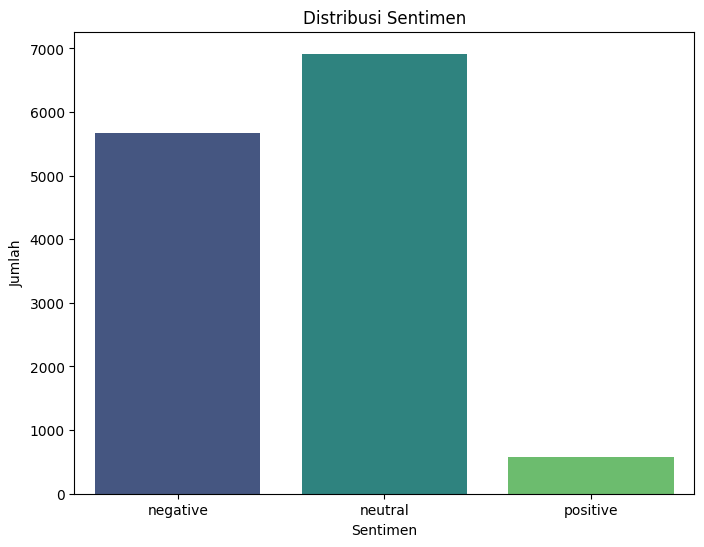

In [132]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi distribusi sentimen dengan label positif, negatif, dan netral
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=df, palette='viridis')
plt.title('Distribusi Sentimen')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.show()


In [133]:
# Menampilkan jumlah real dari setiap label sentimen
label_counts = df['sentiment'].value_counts()
print("Jumlah sampel per label sentimen:")
for label, count in label_counts.items():
    print(f"{label}: {count} sampel")


Jumlah sampel per label sentimen:
neutral: 6917 sampel
negative: 5669 sampel
positive: 583 sampel


       Cleaned_Tweet sentiment
count          13169     13169
unique         12931         3
top                    neutral
freq              41      6917


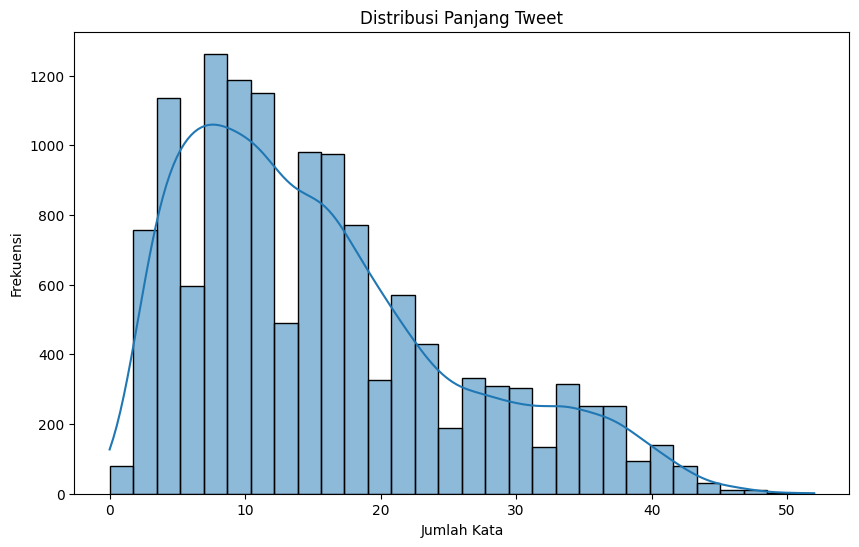

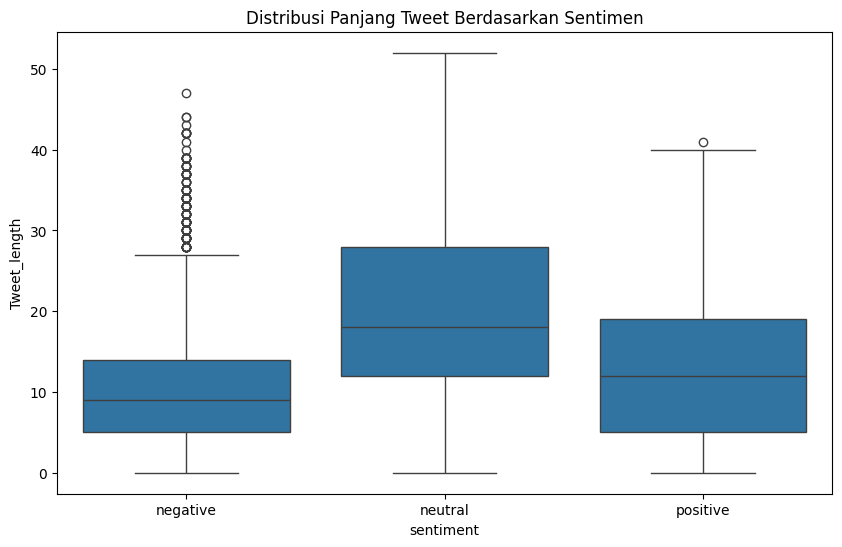

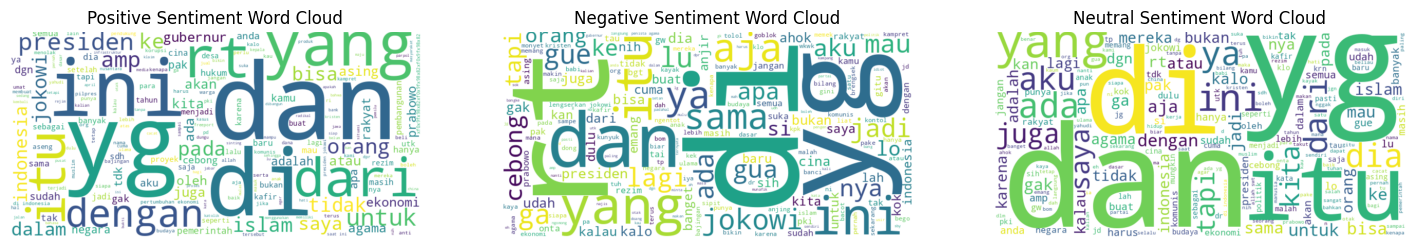

In [134]:
# Menampilkan statistik deskriptif dari kolom 'Tweet' dan 'sentiment'
print(df[['Cleaned_Tweet', 'sentiment']].describe())

# Menampilkan distribusi panjang tweet dalam dataset (jumlah kata per tweet)
df['Tweet_length'] = df['Cleaned_Tweet'].apply(lambda x: len(x.split()))
plt.figure(figsize=(10,6))
sns.histplot(df['Tweet_length'], kde=True, bins=30)
plt.title('Distribusi Panjang Tweet')
plt.xlabel('Jumlah Kata')
plt.ylabel('Frekuensi')
plt.show()

# Melihat distribusi panjang tweet berdasarkan sentimen
plt.figure(figsize=(10,6))
sns.boxplot(x='sentiment', y='Tweet_length', data=df)
plt.title('Distribusi Panjang Tweet Berdasarkan Sentimen')
plt.show()

# Visualisasi word cloud untuk tweet dengan sentimen positif, negatif, dan netral
from wordcloud import WordCloud

# Filter tweet berdasarkan sentimen
positive_tweet = df[df['sentiment'] == 'positive']['Cleaned_Tweet']
negative_tweet = df[df['sentiment'] == 'negative']['Cleaned_Tweet']
neutral_tweet = df[df['sentiment'] == 'neutral']['Cleaned_Tweet']

# Membuat wordcloud untuk setiap sentimen
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(' '.join(positive_tweet))
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(' '.join(negative_tweet))
wordcloud_neutral = WordCloud(width=800, height=400, background_color='white').generate(' '.join(neutral_tweet))

# Plot wordcloud
plt.figure(figsize=(18, 6))
plt.subplot(131)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Positive Sentiment Word Cloud')
plt.axis('off')

plt.subplot(132)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Negative Sentiment Word Cloud')
plt.axis('off')

plt.subplot(133)
plt.imshow(wordcloud_neutral, interpolation='bilinear')
plt.title('Neutral Sentiment Word Cloud')
plt.axis('off')

plt.show()


In [114]:
df.dropna()

,Tweet,sentiment,confidence,sentiment_label,Cleaned_Tweet
0,- disaat semua cowok berusaha melacak perhatia...,negative,0.241718,0,disaat semua cowok berusaha melacak perhatian ...
1,RT USER: USER siapa yang telat ngasih tau elu?...,neutral,0.000000,1,rt user user siapa yang telat ngasih tau elued...
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",neutral,0.000000,1,41 kadang aku berfikir kenapa aku tetap percay...
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,negative,0.267391,0,user user aku itu akunnku tau matamu sipit tap...
4,USER USER Kaum cebong kapir udah keliatan dong...,negative,0.285027,0,user user kaum cebong kapir udah keliatan dong...
...,...,...,...,...,...
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,neutral,0.000000,1,user jangan asal ngomong ndasmu congor lu yg s...
13165,USER Kasur mana enak kunyuk',negative,0.267336,0,user kasur mana enak kunyuk
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,negative,0.226853,0,user hati hati bisu gnnlagi bosan huft xf0x9f...
13167,USER USER USER USER Bom yang real mudah terdet...,neutral,0.000000,1,user user user user bom yang real mudah terdet...


In [119]:

# Split data menjadi training dan testing
X = df['Cleaned_Tweet']
y = df['sentiment_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pastikan X_train dan X_test berisi teks yang valid
assert X_train.apply(lambda x: isinstance(x, str)).all(), "X_train contains non-string values!"
assert X_test.apply(lambda x: isinstance(x, str)).all(), "X_test contains non-string values!"

# Menggunakan TF-IDF untuk vektorisasi hanya pada teks (Cleaned_Tweet)
tfidf = TfidfVectorizer(max_features=5000)

# Vektorisasi data
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Cek hasil vektorisasi
print(X_train_tfidf.shape)

# Model Logistic Regression
model = LogisticRegression(max_iter=1000)

# Latih model dengan data yang sudah tervektorisasi
model.fit(X_train_tfidf, y_train)

# Prediksi dan evaluasi
y_pred = model.predict(X_test_tfidf)





(10535, 5000)


In [120]:
# Evaluasi model
accuracy = accuracy_score(y_test, y_pred) * 100
precision = precision_score(y_test, y_pred, average='weighted') * 100
recall = recall_score(y_test, y_pred, average='weighted') * 100
f1 = f1_score(y_test, y_pred, average='weighted') * 100

# Menampilkan hasil dalam persen
print(f"Accuracy: {accuracy:.2f}%")
print(f"Precision: {precision:.2f}%")
print(f"Recall: {recall:.2f}%")
print(f"F1 Score: {f1:.2f}%")

Accuracy: 70.99%
Precision: 67.76%
Recall: 70.99%
F1 Score: 69.31%


In [121]:
# Menampilkan classification report
print(classification_report(y_test, y_pred, target_names=le.classes_))

              precision    recall  f1-score   support

    negative       0.69      0.69      0.69      1103
     neutral       0.72      0.78      0.75      1411
    positive       0.00      0.00      0.00       120

    accuracy                           0.71      2634
   macro avg       0.47      0.49      0.48      2634
weighted avg       0.68      0.71      0.69      2634



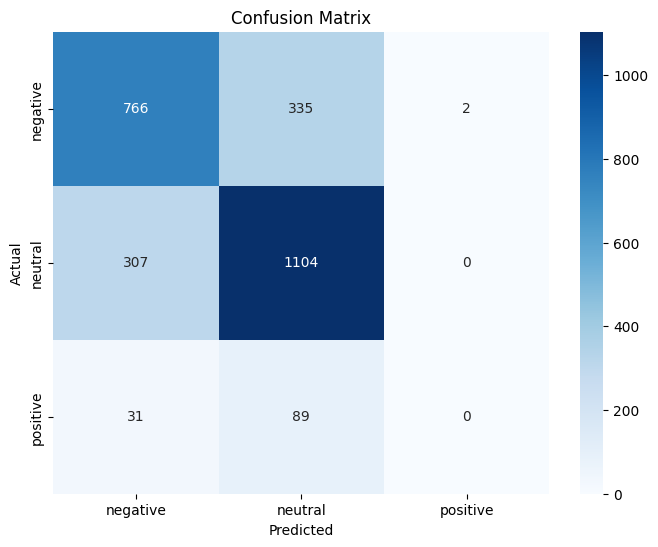

In [122]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()